In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [38]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
from keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.1,  # apply shearing transformations
    zoom_range=0.1,  # randomly zoom inside pictures
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest'  # set mode for filling points outside the input boundaries
)

In [40]:
X = train_df.drop('label', axis=1)
y = train_df['label']

X = X / 255.0
test_df = test_df / 255.0

X = X.values.reshape(-1, 28, 28, 1)
test_df = test_df.values.reshape(-1, 28, 28, 1)

In [41]:
data_gen.fit(X)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min', restore_best_weights=True)

history = model.fit(data_gen.flow(X, y, batch_size=64), epochs=100, callbacks=[early_stopping])

Epoch 1/100
657/657 [==============================] - 8s 11ms/step - loss: 0.6483 - accuracy: 0.7804
Epoch 2/100
657/657 [==============================] - 8s 12ms/step - loss: 0.2488 - accuracy: 0.9204
Epoch 3/100
657/657 [==============================] - 8s 12ms/step - loss: 0.1711 - accuracy: 0.9465
Epoch 4/100
657/657 [==============================] - 8s 12ms/step - loss: 0.1400 - accuracy: 0.9568
Epoch 5/100
657/657 [==============================] - 8s 12ms/step - loss: 0.1245 - accuracy: 0.9595
Epoch 6/100
657/657 [==============================] - 7s 11ms/step - loss: 0.1090 - accuracy: 0.9660
Epoch 7/100
657/657 [==============================] - 7s 11ms/step - loss: 0.1012 - accuracy: 0.9680
Epoch 8/100
657/657 [==============================] - 7s 11ms/step - loss: 0.0921 - accuracy: 0.9705
Epoch 9/100
657/657 [==============================] - 8s 12ms/step - loss: 0.0881 - accuracy: 0.9724
Epoch 10/100
657/657 [==============================] - 8s 11ms/step - loss: 0.082

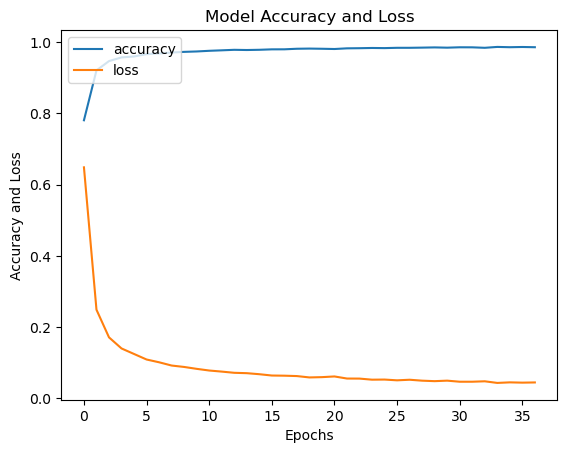

In [45]:
# Plot History Accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy and Loss')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [46]:
# Predict the labels of digit images in our test dataset
predicted_labels = model.predict(test_df)

# Get the index of the label with the highest probability
predicted_labels = np.argmax(predicted_labels, axis=1)

875/875 [==============================] - 2s 2ms/step
Test loss: 0.030632993206381798
Test accuracy: 0.9896666407585144


In [47]:
model.save('digit-detector.h5')

/Users/katiashteyn/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Predict test image
image_path = 'data/image.png'

# Load the image file
img = tf.keras.preprocessing.image.load_img(
    image_path, target_size=(28, 28), color_mode='grayscale'
)

# Convert the image to a numpy array
image = tf.keras.preprocessing.image.img_to_array(img)

# Add a fourth dimension to the image (since Keras expects a list of images, not a single image)
image = np.expand_dims(image, axis=0)

# Normalize the data
image = image / 255.0

# Make a prediction
prediction = model.predict(image)

# Get the index of the target class
target_class = np.argmax(prediction)

# Print the class
print(f'Target class: {target_class}')

1/1 [==============================] - 0s 56ms/step
Target class: 8
